In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading train and test data

In [3]:
data_test = pd.read_csv('/content/test_AbJTz2l.csv')
data_train = pd.read_csv('/content/train_v9rqX0R.csv')

In [4]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
#Preprocessing Train Data

In [6]:
#checking null values
data_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#Filling null values with central tendency

In [8]:
data_train['Outlet_Size'] = data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0])

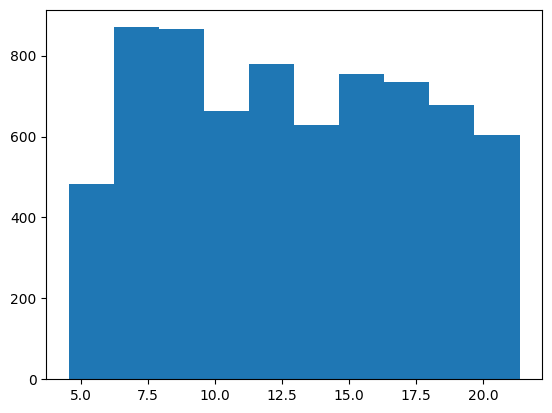

In [9]:
plt.hist(data_train['Item_Weight'])
plt.show()

In [10]:
data_train['Item_Weight'] = data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())

In [11]:
data_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#Checking outlier
data_train['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [13]:
#Checking outlier
data_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [14]:
#Handling datatypes

In [15]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
#Mapping Variable - Item_Fat_Content : Low Fat as 0 and Regular as 1
dict_Item_Fat_Content = {'Low Fat':0,'LF':0,'low fat':0,'Regular':1,'reg':1} 

In [18]:
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].map(dict_Item_Fat_Content)

In [19]:
data_train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
data_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [21]:
#Variable - Outlet_Identifier
data_train['Outlet_Identifier'] = data_train['Outlet_Identifier'].str.replace("OUT0"," ").astype("int32")

In [22]:
data_train['Outlet_Identifier'].value_counts()

27    935
13    932
49    930
46    930
35    930
45    929
18    928
17    926
10    555
19    528
Name: Outlet_Identifier, dtype: int64

In [23]:
#Mapping Variable - Outlet_Size : Small as 0 Medium as 1 High as 2
data_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [24]:
dict_Outlet_Size = {'Small':0, 'Medium':1, 'High':2}

In [25]:
data_train['Outlet_Size'] = data_train['Outlet_Size'].map(dict_Outlet_Size)

In [26]:
#Mapping Variable - Outlet_Location_Type : Tier 1 as 0 Tier 2 as 1 Tier 3 as 2
data_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [27]:
dict_Outlet_Location_Type = {'Tier 1':0 , 'Tier 2':1, 'Tier 3':2}

In [28]:
data_train['Outlet_Location_Type'] = data_train['Outlet_Location_Type'].map(dict_Outlet_Location_Type)

In [29]:
data_train['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [30]:
data_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [31]:
data_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [32]:
data_train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['Item_Identifier'] = le.fit_transform(data_train['Item_Identifier'])

In [34]:
data_train_ohe = data_train[['Outlet_Type','Item_Type']]

In [35]:
data_train_ohe= pd.get_dummies(data_train_ohe)

In [36]:
data_train_concat = pd.concat([data_train ,data_train_ohe],axis = 1 )

In [37]:
data_train_concat = data_train_concat.drop(['Outlet_Type','Item_Type'],axis =1)

In [38]:
data_train_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   int64  
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   int64  
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   int32  
 6   Outlet_Establishment_Year        8523 non-null   int64  
 7   Outlet_Size                      8523 non-null   int64  
 8   Outlet_Location_Type             8523 non-null   int64  
 9   Item_Outlet_Sales                8523 non-null   float64
 10  Outlet_Type_Grocery Store        8523 non-null   uint8  
 11  Outlet_Type_Supermarket Type1    8523 non-null   uint8  
 12  Outlet_Type_Supermar

In [39]:
#Preprocessing test data

In [40]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [41]:
#checking null values
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
#Filling null values with central tendency

In [43]:
data_test['Outlet_Size'] = data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0])

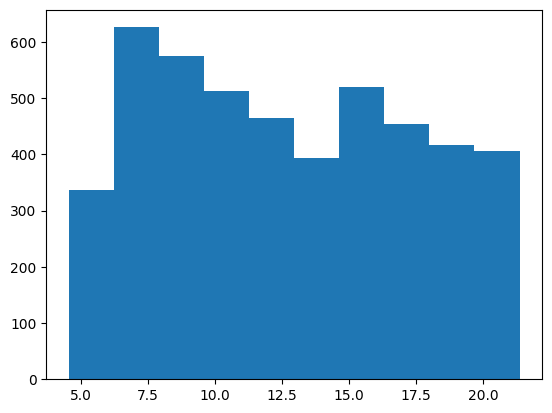

In [44]:
plt.hist(data_test['Item_Weight'])
plt.show()

In [45]:
data_test['Item_Weight'] = data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())

In [46]:
data_test.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [47]:
#Checking outlier
data_test['Item_MRP'].describe()

count    5681.000000
mean      141.023273
std        61.809091
min        31.990000
25%        94.412000
50%       141.415400
75%       186.026600
max       266.588400
Name: Item_MRP, dtype: float64

In [48]:
#Checking outlier
data_test['Item_Weight'].describe()

count    5681.000000
mean       12.695633
std         4.245189
min         4.555000
25%         9.195000
50%        12.695633
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [49]:
#Handling datatypes

In [50]:
data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [51]:
data_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [52]:
#Mapping Variable - Item_Fat_Content : Low Fat as 0 and Regular as 1
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].map(dict_Item_Fat_Content)

In [53]:
data_test['Item_Fat_Content'].value_counts()

0    3668
1    2013
Name: Item_Fat_Content, dtype: int64

In [54]:
data_test['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [55]:
#Variable - Outlet_Identifier
data_test['Outlet_Identifier'] = data_test['Outlet_Identifier'].str.replace("OUT0"," ").astype("int32")

In [56]:
data_test['Outlet_Identifier'].value_counts()

27    624
13    621
49    620
46    620
35    620
45    619
18    618
17    617
10    370
19    352
Name: Outlet_Identifier, dtype: int64

In [57]:
#Mapping Variable - Outlet_Size : Small as 0 Medium as 1 High as 2
data_test['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [58]:
data_test['Outlet_Size'] = data_test['Outlet_Size'].map(dict_Outlet_Size)

In [59]:
#Mapping Variable - Outlet_Location_Type : Tier 1 as 0 Tier 2 as 1 Tier 3 as 2
data_test['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [60]:
data_test['Outlet_Location_Type'] = data_test['Outlet_Location_Type'].map(dict_Outlet_Location_Type)

In [61]:
data_test['Outlet_Location_Type'].value_counts()

2    2233
1    1856
0    1592
Name: Outlet_Location_Type, dtype: int64

In [62]:
data_test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [63]:
data_test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [64]:
le_test = LabelEncoder()
data_test['Item_Identifier'] = le_test.fit_transform(data_test['Item_Identifier'])

In [65]:
data_test_ohe = data_test[['Outlet_Type','Item_Type']]

In [66]:
data_test_ohe= pd.get_dummies(data_test_ohe)

In [67]:
data_test_concat = pd.concat([data_test ,data_test_ohe],axis = 1 )

In [68]:
data_test_concat = data_test_concat.drop(['Outlet_Type','Item_Type'],axis =1)

In [69]:
data_test_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  5681 non-null   int64  
 1   Item_Weight                      5681 non-null   float64
 2   Item_Fat_Content                 5681 non-null   int64  
 3   Item_Visibility                  5681 non-null   float64
 4   Item_MRP                         5681 non-null   float64
 5   Outlet_Identifier                5681 non-null   int32  
 6   Outlet_Establishment_Year        5681 non-null   int64  
 7   Outlet_Size                      5681 non-null   int64  
 8   Outlet_Location_Type             5681 non-null   int64  
 9   Outlet_Type_Grocery Store        5681 non-null   uint8  
 10  Outlet_Type_Supermarket Type1    5681 non-null   uint8  
 11  Outlet_Type_Supermarket Type2    5681 non-null   uint8  
 12  Outlet_Type_Supermar

In [70]:
x_train = data_train_concat.drop("Item_Outlet_Sales",axis = 1)

In [71]:
y_train = data_train_concat['Item_Outlet_Sales']

In [72]:
x_test = data_test_concat

In [73]:
#ML Model creation

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =150, max_depth = 8,max_features= 0.8)

In [75]:
###train the process using x train y train

rf.fit(x_train , y_train)

RandomForestRegressor(max_depth=8, max_features=0.8, n_estimators=150)

In [76]:
y_pred = rf.predict(x_test)

In [77]:
sample_submission = pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [78]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


In [79]:
sample_submission['Item_Outlet_Sales'] = y_pred

In [80]:
sample_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1656.201212
1,FDW14,OUT017,1347.466623
2,NCN55,OUT010,617.670316
3,FDQ58,OUT017,2447.101057
4,FDY38,OUT027,6509.207259


In [81]:
sample_submission.to_csv('sample_submission_RFRegressor.csv', index=False)